# Import

In [1]:
import numpy as np,scipy.stats as ss
import yfinance as yf
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt

# Import py file

In [2]:
import RiskLabAI.data.distance.distance_metric as dm

# Data

In [3]:
x = yf.Ticker("AAPL").history(start = "2020-01-01")['Close']
y = yf.Ticker("TSLA").history(start = "2020-01-01")['Close']

# Snippet 3-1

In [4]:
cXY = np.histogram2d(x, y)[0]
hX = ss.entropy(np.histogram(x)[0]) # marginal
hY = ss.entropy(np.histogram(y)[0]) # marginal
iXY = mutual_info_score(None, None, contingency = cXY)
iXYn = iXY/min(hX, hY) # normalized mutual information
hXY = hX + hY - iXY # joint
hX_Y = hXY - hY # conditional
hY_X = hXY - hX # conditional

# Snippet 3-2

In [5]:
dm.calculate_variation_of_information(x, y, bins = 10, norm = True)

0.791068624347677

# Snippet 3-3

In [6]:
dm.calculate_variation_of_information_extended(x, y, norm = True)

0.7852303564801258

# Snippet 3-4

In [7]:
size, seed = 5000, 0
np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 0*x + e
nmi = dm.calculate_mutual_information(x,y,True)
corr = np.corrcoef(x,y)[0,1]
(corr, nmi)

(0.001496837406727644, 0.006764619108279091)

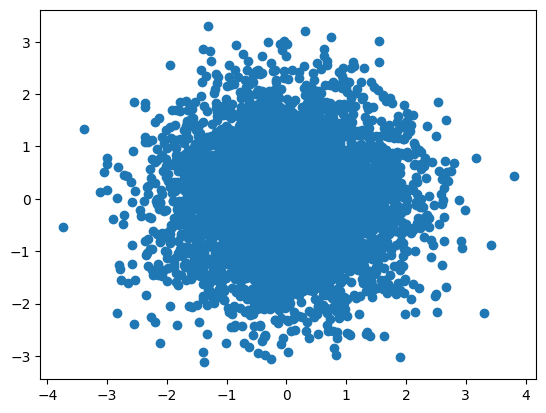

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
size, seed = 5000, 0
np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 10000*x + e
nmi = dm.calculate_mutual_information(x, y, True)
corr = np.corrcoef(x, y)[0, 1]
(corr, nmi)

(0.9999999949550482, 0.9949768013924747)

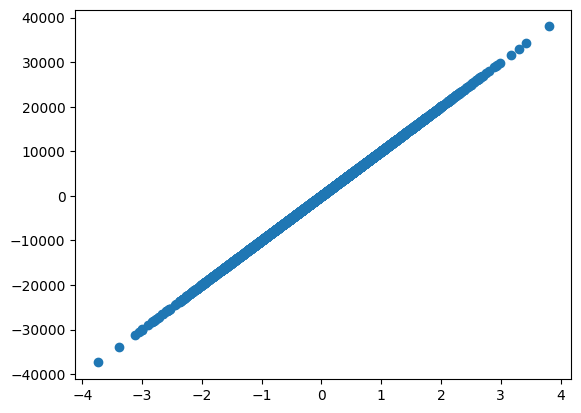

In [10]:
plt.scatter(x, y)
plt.show()

In [11]:
size, seed=5000, 0
np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 10000*abs(x) + e
nmi = dm.calculate_mutual_information(x, y, True)
corr = np.corrcoef(x, y)[0, 1]
(corr, nmi)

(-0.007989423072464771, 0.6456262346759295)

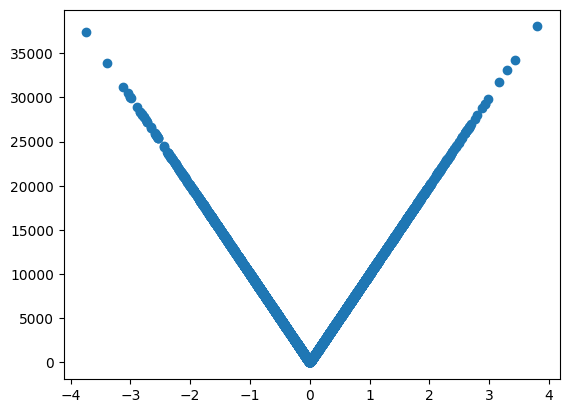

In [12]:
plt.scatter(x, y)
plt.show()